# Compute performance metrics for the given Y and Y_score without sklearn

In [18]:
import numpy as np
import pandas as pd
from tqdm import tqdm
# other than these two you should not import any other packages
data=pd.read_csv('5_a.csv')
data.head()
data[data.proba<0.5]

,y,proba


In [20]:
def precision(TP,FP):
    '''This function calculates the precision(Precision tells out of all predicted Positive, how many are actually positive)
    '''
    p=TP/(TP+FP)
    return p
def recall(TP,FN):
    '''This function calculates the recall(Recall, tells out of all actual positives, how many was the model able to predict correctly)
    '''
    r=TP/(TP+FN)
    return r
def f1_score(p,r):
    '''This functions returns the f1 score
    '''
    f1=(2*p*r)/(p+r)
    return f1

def calculator(y_actual,y_predicted):
    '''This function returns the confusion matrix
    '''
    TP=0
    FP=0
    TN=0
    FN=0
    for x in range(len(y_actual)):
        if y_actual[x]==1:
            if y_predicted[x]==1:
                TP+=1
            else:
                FP+=1
        if y_actual[x]==0:
            if y_predicted[x]==0:
                TN+=1
            else:
                FN+=1
    return([TN,TP],[FN,FP])
print(calculator(y_actual,y_predicted))

([894, 1647], [4823, 4788])



## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

10000 0 0 100
0.9950248756218906


In [5]:
import numpy as np
data=np.loadtxt('5_a.csv',delimiter=',', dtype=str)
df=data[1:].astype('float64')
df=df[np.argsort(df[:,1])][::-1]
y_a=df[:,:1]
y_p=df[:,1:2]

y_actual=y_a.copy()
y_predict=y_p.copy()
y_predict[y_predict>0.5]=1
y_predict[y_predict<0.5]=0
def calculator(y_actual,y_predicted):
    '''This function returns the confusion matrix
    '''
    TP=0
    FP=0
    TN=0
    FN=0
    for x in range(len(y_actual)):
        if y_actual[x]==1:
            if y_predicted[x]==1:
                TP+=1
            else:
                FP+=1
        if y_actual[x]==0:
            if y_predicted[x]==0:
                TN+=1
            else:
                FN+=1
    return(TP,FP,TN,FN)
calculator(y_actual,y_predict)


def AUC(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    tpr_array=[]
    fpr_array=[]
    proba=sorted_array[:,prob_index]
    for p in tqdm(proba):
        y_actual=sorted_array[:,actual_y_index]
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted<p]=0
        TP,FP,TN,FN=calculator(y_actual,y_predicted)
        TPR=TP/(TP+FP)
        FPR=FP/(TN +FN)
        tpr_array.append(TPR)
        fpr_array.append(FPR)
    auc_score=np.trapz(tpr_array, fpr_array)
    return(auc_score)

AUC(df,1,0)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:14<00:00, 75.30it/s]


-49.99000050000001

In [22]:
import numpy as np
data=np.loadtxt('5_a.csv',delimiter=',', dtype=str)
df=data[1:].astype('float64')
df=df[np.argsort(df[:,1])][::-1]

def AUC(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    tpr_array=[]
    fpr_array=[]
    proba=sorted_array[:,prob_index]
    for p in tqdm(proba):
        y_actual=sorted_array[:,actual_y_index]
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted<p]=0
        cm=calculator(y_actual,y_predicted)
        TN,FN=cm[0]
        FP,TP=cm[1]
        TPR=TP/(TP+FP)
        FPR=FP/(TN +FN)
        tpr_array.append(TPR)
        fpr_array.append(FPR)
    return(tpr_array, fpr_array)

tpr,fpr=AUC(df,1,0)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:03<00:00, 81.98it/s]


<AxesSubplot:>

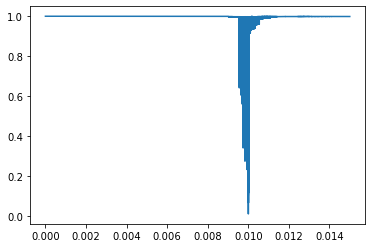

In [24]:
import seaborn as sns
sns.lineplot(x=fpr,y=tpr)

In [25]:
np.trapz(tpr,fpr)

0.009845948266865587

In [25]:
def Accuracy_score(y_actual,y_predicted):
    correct=0
    wrong=0
    for x in range(len(y_actual)):
        
        if y_actual[x]==y_predicted[x]:
            correct+=1
        else:
            wrong+=1
    acc=correct/len(y_actual)
    return(acc)

Accuracy_score(y_actual,y_predicted)

0.0

In [24]:
data=np.loadtxt('5_a.csv',delimiter=',', dtype=str)
df=data[1:].astype('float64')
df=df[np.argsort(df[:,1])][::-1]
df[:,1]

array([0.89996535, 0.89982831, 0.89982485, ..., 0.50005801, 0.50004734,
       0.50001859])

In [ ]:
        TPR=TP/(TP+FP)
        FPR=FP/(TN +FN)
        tpr_array.append(TPR)
        fpr_array.append(FPR)
    return(tpr_array, fpr_array)

In [ ]:
TPR=TP/(TP+FP)
        FPR=FP/(TN +FN)
        tpr_array.append(TPR)
        frp_array.append(FPR)
    return(tpr_array, fpr_array)


In [36]:
#print(type(prob))
x='proba'
y=0.5
prob[x][prob[x]>0]=1
pd.to_numeric(prob['proba'],downcast='integer')



C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,proba
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
# write your code here for task A



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [28]:
df_b=np.loadtxt('5_b.csv', delimiter=',',dtype=str)
df=df_b[1:,:].astype('float64')
df=df[np.argsort(df[::,1])][::-1]
df#Main data



array([[1.        , 0.59529418],
       [1.        , 0.5948084 ],
       [1.        , 0.59219787],
       ...,
       [0.        , 0.10016508],
       [0.        , 0.1001608 ],
       [0.        , 0.10000141]])

In [29]:
data=df.copy()
y_actual=data[:,0]
y_predicted=data[:,1]

y_pred1=y_predicted.copy()
y_pred1[y_pred1>0.5]=1
y_pred1[y_pred1<0.5]=0
(TP,FP,TN,FN)=calculator(y_actual,y_pred1)
f1_score(TP,FP,TN,FN)


0.2791878172588833

In [30]:
def precision(TP,FP):
    '''This function calculates the precision
    '''
    p=TP/(TP+FP)
    return p
def recall(TP,FN):
    '''This function calculates the recall
    '''
    r=TP/(TP+FN)
    return r
def f1_score(TP,FP,TN,FN):
    '''This functions returns the f1 score
    '''
    p=precision(TP,FP)
    r=recall(TP,FN)
    f1=(2*p*r)/(p+r)
    return f1

In [17]:
AUC(df,1,0)



100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [02:12<00:00, 76.33it/s]


-0.005

In [31]:
def Accuracy_score(y_actual,y_predicted):
    correct=0
    wrong=0
    for x in range(len(y_actual)):
        
        if y_actual[x]==y_predicted[x]:
            correct+=1
        else:
            wrong+=1
    acc=correct/len(y_actual)
    return(acc)

Accuracy_score(y_actual,y_pred1)

0.9718811881188119

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [48]:
df_c=np.loadtxt('5_c.csv',delimiter=',',dtype=str)
df_c
df_c=df_c[1:,:].astype('float64')
sorted_df_c=df_c[np.argsort(df_c[:,1])][::-1]
sorted_df_c

array([[1.        , 0.9577468 ],
       [1.        , 0.95143692],
       [1.        , 0.94863779],
       ...,
       [0.        , 0.02896366],
       [0.        , 0.02839574],
       [0.        , 0.02803799]])

In [66]:
def best_threshold(sorted_array,prob_index,actual_y_index ):#pcolumn_name is a string with the name of the column with probabilities
    '''numpy code
    '''
    a_scores=[]
    p_values=[]
    proba=sorted_array[:,prob_index]
    for p in tqdm(proba):
        y_actual=sorted_array[:,actual_y_index]
        y_predicted=proba.copy()
        y_predicted[y_predicted>p]=1
        y_predicted[y_predicted<p]=0
        TP,FP,TN,FN=calculator(y_actual,y_predicted)
        A=(500*FN)+ (100*FP)
        a_scores.append(A)
        p_values.append(p)
    return(a_scores,p_values)

sorted_df_c
df=sorted_df_c.copy()
a_score,p_value=best_threshold(df,1,0)

100%|█████████████████████████████████████████████████████████████████████████████| 2852/2852 [00:10<00:00, 277.92it/s]


In [69]:
min(a_score)
a_score.index(88400)
p_value[337]

0.6434015901507558


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [2]:
df_d=np.loadtxt('5_d.csv',delimiter=',',dtype=str)
#print(df_d[:5,:])
df_d=df_d[1:,:].astype('float64')
y_actual=df_d[:,0]
y_predicted=df_d[:,1]

In [12]:
def mean_square_error(y_actual,y_predicted):
    square_error=[]
    for i in tqdm(range(len(y_actual))):
        e_i=(y_actual[i]-y_predicted[i])
        square_error.append(e_i**2)
    print(sum(square_error))
    mean=np.mean(square_error)
    return(mean)
mean_square_error(y_actual,y_predicted)

100%|██████████████████████████████████████████████████████████████████████| 157200/157200 [00:00<00:00, 820766.35it/s]

27850448.0


177.16569974554707

In [9]:
def MAPE(y_actual,y_predicted):
    abs_error=[]
    for x in tqdm(range(len(y_actual))):
        e_i=abs(y_actual[x]-y_predicted[x])
        abs_error.append(e_i)
    s=sum(y_actual)
    MAPE=(sum(abs_error)/s)
    return(MAPE)

MAPE(y_actual,y_predicted)
    
    

100%|██████████████████████████████████████████████████████████████████████| 157200/157200 [00:00<00:00, 949056.39it/s]


0.1291202994009687

In [17]:
def r2_error(y_actual,y_predicted):
    ss_res=0
    ss_tot=0
    m=np.mean(y_actual)
    for i in range (len(y_actual)):
        e_i=(y_actual[i]-y_predicted[i])**2
        ss_res+=e_i
        x_i=(y_actual[i]-m)**2
        ss_tot+=x_i
    r2_error=1-(ss_res/ss_tot)
    return(r2_error)
r2_error(y_actual,y_predicted)

0.9563582786990964